# [Cardio Vascular Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

# EDA + Data Prep

### Features (X)
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm)
- Weight | Objective Feature | weight | float (kg)
- Gender | Objective Feature | gender | categorical code
- Systolic blood pressure | Examination Feature | ap_hi | int
- Diastolic blood pressure | Examination Feature | ap_lo | int
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
- Smoking | Subjective Feature | smoke | binary
- Alcohol intake | Subjective Feature | alco | binary
- Physical activity | Subjective Feature | active | binary

In [764]:
import pandas as pd

file_path = 'cardio_train_dataset.csv'

cardio_data_frame = pd.read_csv(file_path)

cardio_data_frame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,M,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,F,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,F,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,M,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,F,156,56.0,100,60,1,1,0,0,0,0


## Categorical Feature Mapping

we will map our categorical feature to numerical values

In [765]:
conversion_dictionary = { 'F' : 1, 'M' : 2  }

cardio_data_frame = cardio_data_frame.replace({"gender" : conversion_dictionary})
cardio_data_frame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Imputation


In [766]:
cardio_data_frame = cardio_data_frame.dropna()

cardio_data_frame = cardio_data_frame.drop('id', axis=1)

cardio_data_frame['age'] = round(cardio_data_frame['age'] / 365)

cardio_data_frame['bmi'] = cardio_data_frame['weight'] / (cardio_data_frame['height'] / 100)**2

cardio_data_frame.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [767]:
cardio_features = ['age', 'gender', 'height','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'bmi', 'active']

X = cardio_data_frame[cardio_features]
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,bmi,active
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,27.556513,0.803729
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,6.091511,0.397179
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,3.471784,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,23.875115,1.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,26.374068,1.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,30.222222,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,298.666667,1.000000


### Y Axis
 - Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [768]:
Y = cardio_data_frame.cardio
Y.describe()


count    70000.000000
mean         0.499700
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

# Data plotting


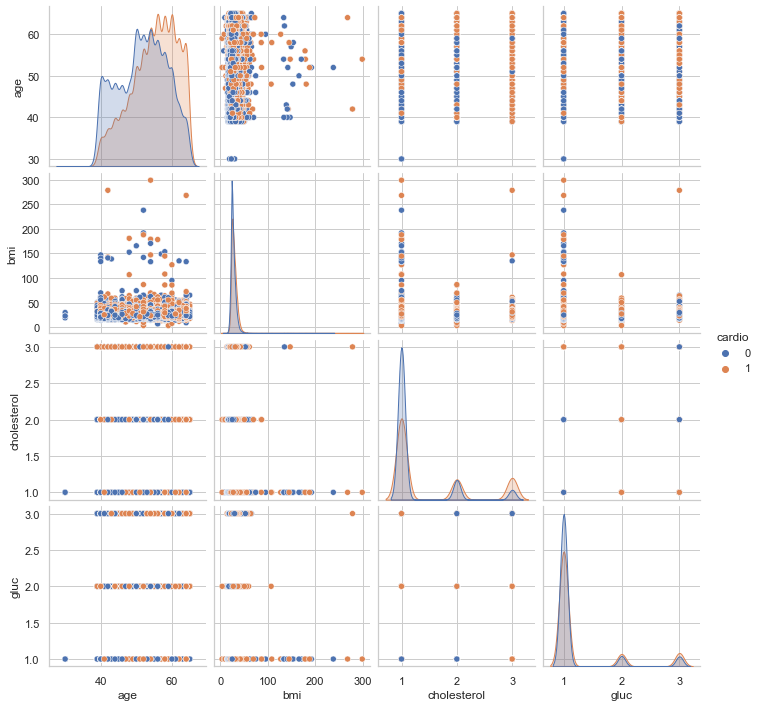

In [769]:
import seaborn as sns

cardio_features = ['age', 'bmi', 'cholesterol', 'gluc', 'cardio']

#sns.pairplot(x_vars=cardio_features, y_vars=cardio_features, data=cardio_data_frame, palette='bright')
#cardio_data_frame[cardio_features].corr()

sns.pairplot(data=cardio_data_frame[cardio_features], hue='cardio')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 'cholesterol'),
  Text(3, 0, 'gluc')])

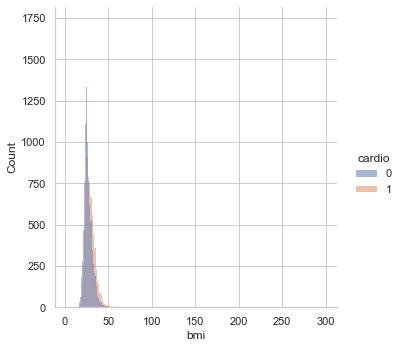

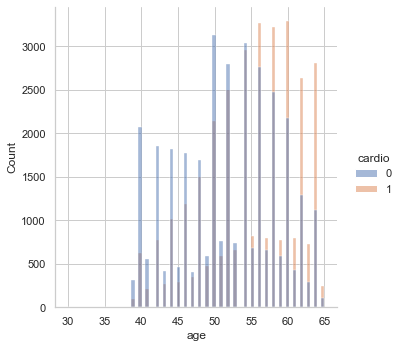

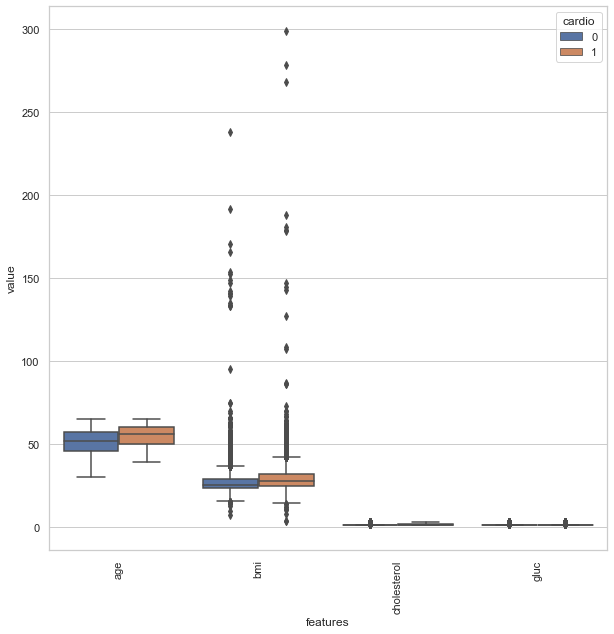

In [770]:
sns.displot(data=cardio_data_frame, x='bmi', hue='cardio')

sns.displot(data=cardio_data_frame, x='age', hue='cardio')

x_melted = pd.melt(frame=cardio_data_frame, id_vars="cardio", value_vars=cardio_features, var_name="features", value_name="value", col_level=None)
x_melted

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)


# Model Tuning


# Split the Dataset

In [771]:
from sklearn.model_selection import train_test_split

trainX, validationX, trainY, validationY = train_test_split(X, Y, random_state=0)


# Outliers Standardization

In [772]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(trainX)

#trainX = scaler.transform(trainX)

trainX.mean(axis=0)

trainX.std(axis=0)


age              6.755423
gender           0.477285
height           8.200283
weight          14.356398
ap_hi          145.930319
ap_lo          187.341939
cholesterol      0.680059
gluc             0.571030
smoke            0.284430
alco             0.225945
bmi              6.093585
active           0.397235
dtype: float64

 # 1. Decision Tree Model Implementation

In [773]:
from sklearn.tree import  DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
cardio_decision_tree_model = DecisionTreeClassifier(random_state=1)

#Fitting Model
cardio_decision_tree_model.fit(trainX, trainY)

cardio_decision_tree_model.predict(validationX)

array([0, 0, 0, ..., 0, 0, 1])

### Mean Absolute Error

In [774]:
from sklearn.metrics import mean_absolute_error

valPredictions = cardio_decision_tree_model.predict(validationX)
mean_absolute_error(validationY, valPredictions)


0.36742857142857144